In [2]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# pandas read csv
resumeDataSet = pd.read_csv('/Users/favor/Downloads/moved/TrainingResumeData2.csv',encoding='utf-8')

# create column for cleaned data
resumeDataSet['cleaned_resume'] = ''
resumeDataSet=resumeDataSet.fillna('nan')
# resumeDataSet.fillna('nan')
resumeDataSet.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",


In [3]:
# pip install sklearn

In [4]:
resumeDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Category        962 non-null    object
 1   Resume          962 non-null    object
 2   cleaned_resume  962 non-null    object
dtypes: object(3)
memory usage: 22.7+ KB


In [5]:
print ("Displaying the distinct categories of resume:\n\n ")
print (resumeDataSet['Category'].unique())

Displaying the distinct categories of resume:

 
['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


In [6]:
print ("Displaying the distinct categories of resume and the number of records belonging to each category:\n\n")
print (resumeDataSet['Category'].value_counts())

Displaying the distinct categories of resume and the number of records belonging to each category:


Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64


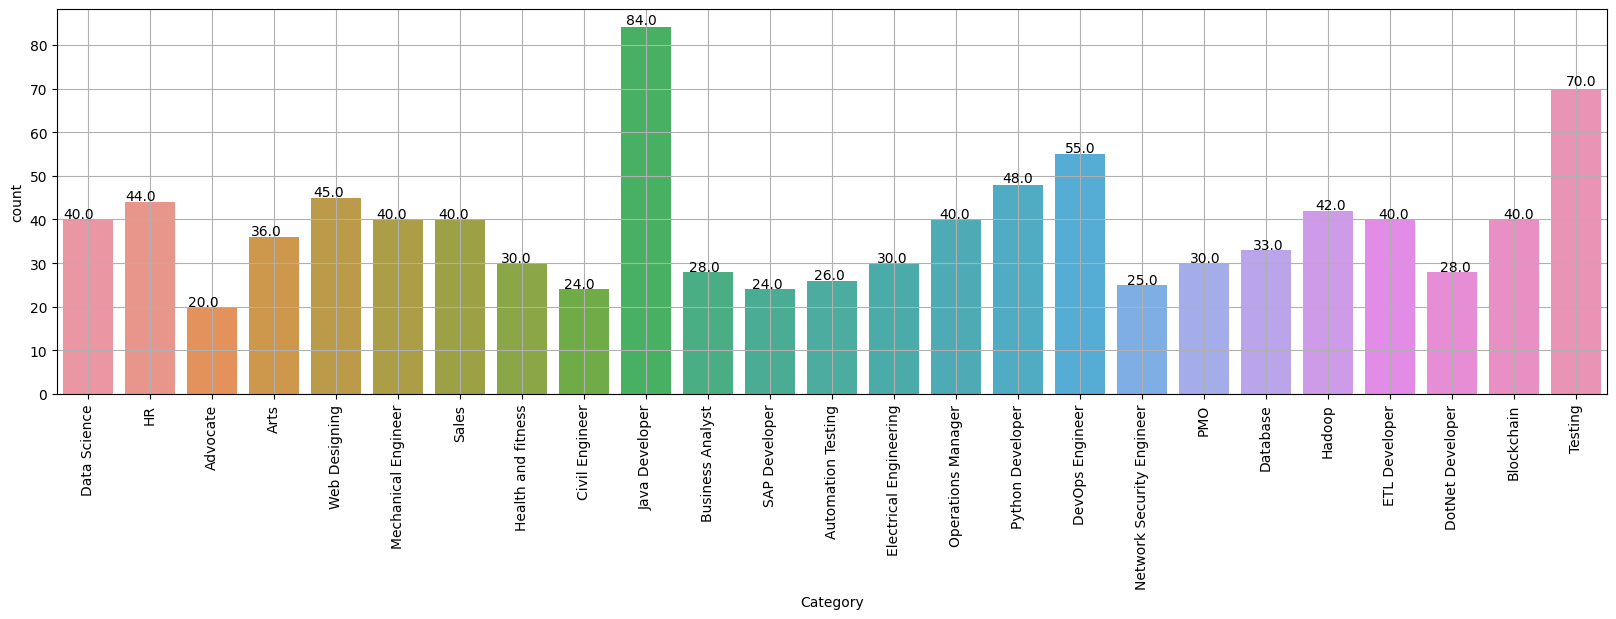

In [7]:
# visualize data on bar charts
mport seaborn as sns
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
ax=sns.countplot(x="Category", data=resumeDataSet)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.grid()

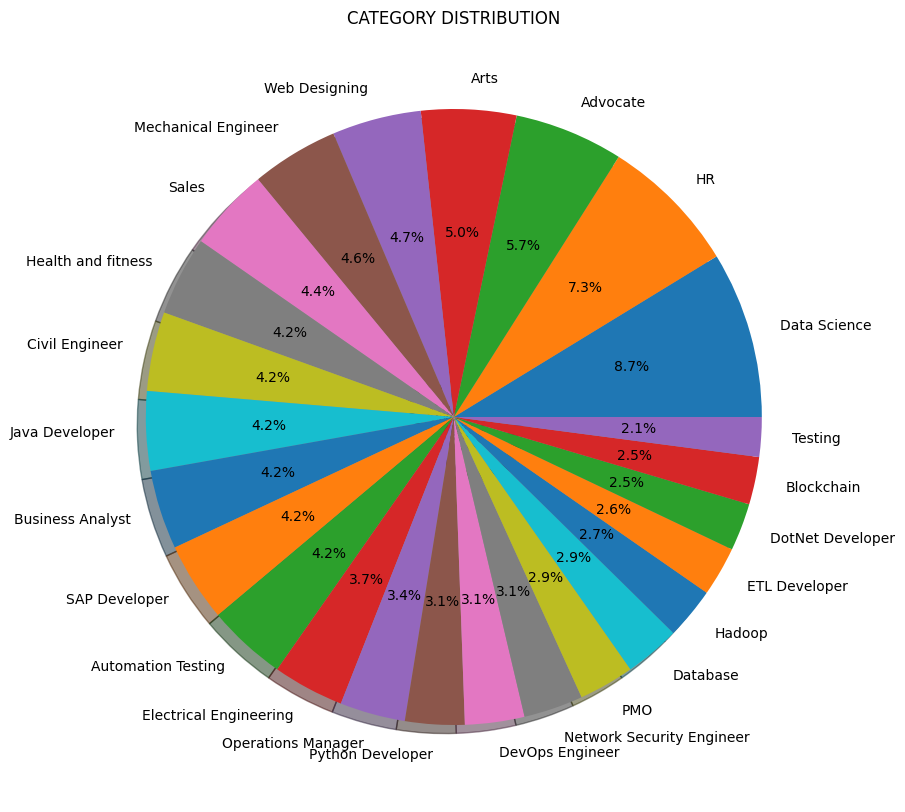

In [8]:
# # visualize data on pie charts
from matplotlib.gridspec import GridSpec
targetCounts = resumeDataSet['Category'].value_counts()
targetLabels  = resumeDataSet['Category'].unique()
# Make square figures and axes
plt.figure(1, figsize=(22,22))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('coolwarm')
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')

source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True)
plt.show()

In [9]:
# remove special characters from the training data
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText
    
resumeDataSet['cleaned_resume'] = resumeDataSet.Resume.apply(lambda x: cleanResume(x))

In [10]:
resumeDataSet.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [11]:
resumeDataSet_d=resumeDataSet.copy()

In [12]:
# Remove stop words from training data
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = resumeDataSet['Resume'].values
cleanedSentences = ""
for records in Sentences:
    cleanedText = cleanResume(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
# print(mostcommon)



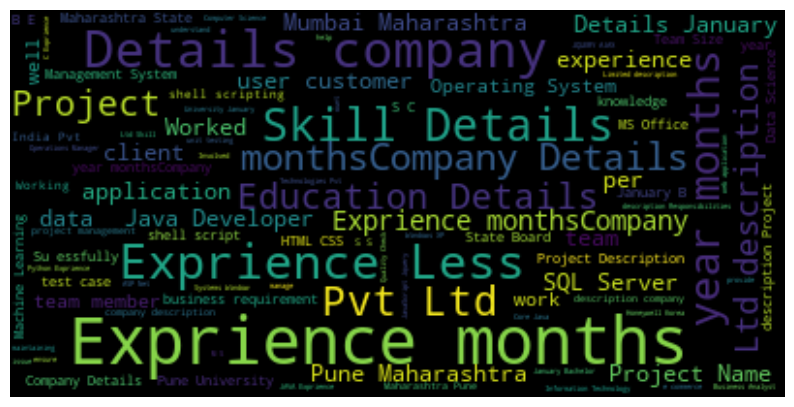

In [13]:
# Visualize training data on word cloud
wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [14]:
# encode labels
from sklearn.preprocessing import LabelEncoder

var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    resumeDataSet[i] = le.fit_transform(resumeDataSet[i])

In [15]:
resumeDataSet.head()

,Category,Resume,cleaned_resume
0,6,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,6,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [16]:
resumeDataSet.Category.value_counts()

15    84
23    70
8     55
20    48
24    45
12    44
13    42
3     40
10    40
18    40
6     40
22    40
16    40
1     36
7     33
11    30
14    30
19    30
4     28
9     28
2     26
17    25
21    24
5     24
0     20
Name: Category, dtype: int64

In [17]:
# resumeDataSet_d.Category.value_counts() #understanding decode LabelEncoder
# resumeDataSet.Category.value_counts()

In [18]:
# del resumeDataSet_d #clearing the space occupied 

In [19]:
# Train model
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

requiredText = resumeDataSet['cleaned_resume'].values
requiredTarget = resumeDataSet['Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english')
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

# print ("Feature completed .....")

X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=42, test_size=0.2,
                                                 shuffle=True, stratify=requiredTarget)
# print(X_train.shape)
# print(X_test.shape)

Feature completed .....
(769, 7351)
(193, 7351)


In [20]:
# test model using the train_test data
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set:     {:.2f}'.format(clf.score(X_test, y_test)))



Accuracy of KNeighbors Classifier on training set: 0.99
Accuracy of KNeighbors Classifier on test set:     0.98


In [ ]:
print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))


 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier()):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         7
           2       0.75      0.60      0.67         5
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         5
           6       0.89      1.00      0.94         8
           7       1.00      0.86      0.92         7
           8       1.00      0.91      0.95        11
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         8
          11       0.86      1.00      0.92         6
          12       1.00      1.00      1.00         9
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00         6
          15       1.00      1.00      1.

In [48]:
# save model
import pickle
saved = pickle.dumps(clf)

In [23]:
# pip install pandas

In [35]:
# load actual dataset for test
resumeDataSet = pd.read_csv('/Users/favor/Downloads/moved/naigeria.csv' ,encoding='utf-8')


# resumeDataSet = pd.read_csv('/Users/favor/Downloads/moved/people.csv' ,encoding='utf-8')

# resumeDataSet = pd.read_csv('../input/resume-dataset/UpdatedResumeDataSet.csv')
resumeDataSet['cleaned_resume'] = ''
resumeDataSet['Resume'] = resumeDataSet['skills']
resumeDataSet['candidatename'] = resumeDataSet['filename']
resumeDataSet=resumeDataSet.fillna('nan')
# resumeDataSet.fillna('nan')
resumeDataSet.head()

,email,phone,name,total_exp,university,designition,degree,skills,Companies worked at,filename,cleaned_resume,Resume,candidatename
0,nan,nan,Ajanaku Jimoh,21,['olabisi onabanjo university '],"['accountant', 'site manager']",[],"['Â\xa0\n', 'â\x9c\x93 Good inter.Â\xa0\n', 'â...","['Intercontinental Bank', 'Abbey Joyce & Assoc...",mining_Ajanaku-Jimoh,,"['Â\xa0\n', 'â\x9c\x93 Good inter.Â\xa0\n', 'â...",mining_Ajanaku-Jimoh
1,nan,nan,Adedotun Adepoju,0,['covenant university'],"['data engineer', 'data analyst', 'science int...","['B54', 'B.Eng in Electrical and Electronics E...","['â\x80¢Python\n', 'â\x80¢SQL\n', 'â\x80¢Machi...",[],triam_python_Adedotun-Adepoju,,"['â\x80¢Python\n', 'â\x80¢SQL\n', 'â\x80¢Machi...",triam_python_Adedotun-Adepoju
2,adeolaayo311@gmail.com,8167144748,Ayomikun Emmanuel,0,['university of ibadan'],"['software developer', 'backend developer']","['M.sc in Petroleum Geology', 'B.sc in Geology']",['and app based lease to own platform that und...,[],triam_remote_Ayomikun-Emmanuel,,['and app based lease to own platform that und...,triam_remote_Ayomikun-Emmanuel
3,nan,nan,Adenike Ajayi,19,"['university of leicester', 'university of tec...","['sales lead', 'sales executive', 'business de...","[""Master's in Human Resource Management"", 'Und...","['â\x80¢Managerial Slills (10+ years)\n', 'Awa...","['Starcomms Nigeria Limited', 'Oil & Gas']",triam_remote_Adenike-Ajayi,,"['â\x80¢Managerial Slills (10+ years)\n', 'Awa...",triam_remote_Adenike-Ajayi
4,nan,nan,Tola Olaide,3,['university of technology'],"['student', 'representative', 'academic coordi...","['M.Tech', 'Matter Physics', 'B.Tech in Physic...","['â\x80¢(Matlab/Python)\n', 'â\x80¢Birrel Aven...",[],triam_python_Tola-Olaide,,"['â\x80¢(Matlab/Python)\n', 'â\x80¢Birrel Aven...",triam_python_Tola-Olaide


In [36]:
# select columns of interest
resumeDataSet = resumeDataSet[['cleaned_resume','Resume','candidatename']]
resumeDataSet.head()

,cleaned_resume,Resume,candidatename
0,,"['Â\xa0\n', 'â\x9c\x93 Good inter.Â\xa0\n', 'â...",mining_Ajanaku-Jimoh
1,,"['â\x80¢Python\n', 'â\x80¢SQL\n', 'â\x80¢Machi...",triam_python_Adedotun-Adepoju
2,,['and app based lease to own platform that und...,triam_remote_Ayomikun-Emmanuel
3,,"['â\x80¢Managerial Slills (10+ years)\n', 'Awa...",triam_remote_Adenike-Ajayi
4,,"['â\x80¢(Matlab/Python)\n', 'â\x80¢Birrel Aven...",triam_python_Tola-Olaide


In [43]:
import string
import re
sample_str = "Test&[88]%%$$$#$%-+String"
# Create a regex pattern to match all special characters in string
pattern = r'[' + string.punctuation + ']'
# Remove special characters from the string
sample_str = re.sub(pattern, '', sample_str)
print(sample_str)

Test88String


In [46]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText)
    resumeText = re.sub(r'[~^0-9]', ' ', resumeText)
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText
    
resumeDataSet['cleaned_resume'] = resumeDataSet.Resume.apply(lambda x: cleanResume(x))
resumeDataSet.to_csv('view.csv')
resumeDataSet.head()

In [ ]:
requiredText2 = resumeDataSet['cleaned_resume'].values
# requiredTarget = resumeDataSet['Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english')
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText2)

# print ("Feature completed .....")

# X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=42, test_size=0.2,
#                                                  shuffle=True, stratify=requiredTarget)
# print(X_train.shape)
# print(X_test.shape)

In [57]:
clf2 = pickle.loads(saved)
clf2.predict(WordFeatures)
# clf2.to_csv('result.csv')

array([ 6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,  0,
        0,  0,  0,  0, 12,  0,  0,  0,  0,  0,  0,  0,  0,  0, 12,  0,  0,
        0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
       24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
       24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 22

In [55]:
# for token in tokenizer(clf2):
#     print vec.vocabulary_.get(token)